In [7]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

'2.2.4'

In [8]:
data_dir = '/Users/joannakang/Desktop/Kakao-CNN/kakao'

In [9]:
class_name = os.listdir(data_dir)
print(class_name)

['Apeach', 'Muzi_con', '.DS_Store', 'Jay']


In [10]:
train_input = []
train_label = []

In [11]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
for index in range(len(class_name)):
    path = os.path.join(data_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((28, 28, 1))
        train_input.append(img)
        train_label.append(onehot_encoded[index])

In [125]:
print(len((train_input)))
print(len(train_label))

71
71


In [126]:
train_input = np.array(train_input)
train_label = np.array(train_label)
train_input.shape

(71, 28, 28, 1)

In [127]:
a = train_input[1].reshape(28, 28)

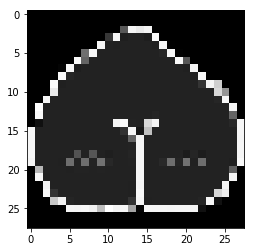

In [128]:
plt.imshow(a, cmap = 'Greys')

In [129]:
print(train_input.shape)
print(train_label.shape)

(71, 28, 28, 1)
(71, 3)


In [135]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(train_label.shape[1], activation = 'sigmoid'))

In [136]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
__________

In [137]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [138]:
model.fit(x = train_input, y = train_label, batch_size = 5, epochs = 5)

Epoch 1/5
71/71 [==============================] - 6s 83ms/step - loss: 0.8895 - acc: 0.9296
Epoch 2/5
71/71 [==============================] - 1s 20ms/step - loss: 2.8584e-07 - acc: 1.0000
Epoch 3/5
71/71 [==============================] - 1s 19ms/step - loss: 1.7748e-07 - acc: 1.0000
Epoch 4/5
71/71 [==============================] - 1s 20ms/step - loss: 1.4078e-07 - acc: 1.0000
Epoch 5/5
71/71 [==============================] - 2s 22ms/step - loss: 1.1930e-07 - acc: 1.0000


In [139]:
model.evaluate(x = train_input, y = train_label)

71/71 [==============================] - 0s 829us/step


[1.1284632230847781e-07, 1.0]